# Various simulations related to the signature and the randomized signature

### Mechanism for Brownian Motion

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
class Brownian():
    """
    A Brownian motion class constructor
    """
    def __init__(self,x0=0):
        """
        Init class
        """
        assert (type(x0)==float or type(x0)==int or x0 is None), "Expect a float or None for the initial value"
        
        self.x0 = float(x0)
    
    def gen_random_walk(self,n_step=100):
        """
        Generate motion by random walk
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        # Warning about the small number of steps
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution with probability 1/2
            yi = np.random.choice([1,-1])
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def gen_normal(self,n_step=100):
        """
        Generate motion by drawing from the Normal distribution
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution
            yi = np.random.normal()
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w

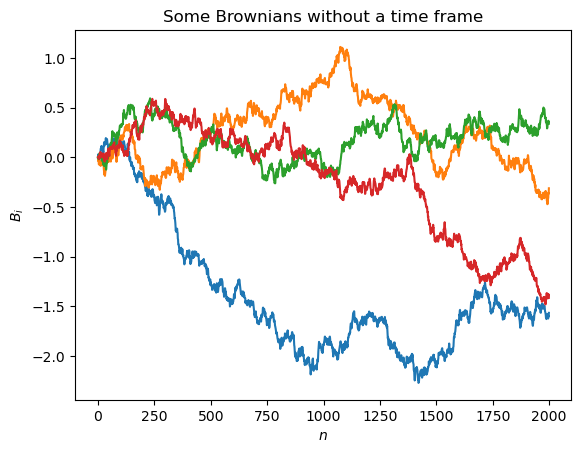

In [3]:
b = Brownian()
for i in range(4):
    plt.plot(1*b.gen_normal(2000))

plt.title("Some Brownians without a time frame")
plt.xlabel("$n$")
plt.ylabel("$B_i$")
plt.show()

### Mechanism for random matrices and vectors

In [4]:
A = np.random.normal(0, 1, size=(3, 2, 4))
v = np.random.normal(0, 1, size=(3))

In [5]:
A, v

(array([[[ 9.74542161e-01, -6.56270136e-02, -1.18334547e+00,
          -1.40362134e+00],
         [ 9.64768670e-04,  7.59428886e-01,  1.35174536e+00,
          -3.75031061e-01]],
 
        [[ 8.42910004e-01, -1.43138662e+00, -1.13704452e+00,
           5.35403057e-02],
         [-5.31386824e-02, -5.57513137e-01,  6.68539539e-01,
           1.62423037e+00]],
 
        [[ 1.51835537e+00,  5.85146160e-01,  1.95842419e+00,
           8.93587409e-01],
         [-8.50313358e-01, -3.61028575e-01,  3.90660136e-01,
           3.07383562e-02]]]),
 array([-0.07583912, -0.08021779,  0.66462235]))

### Time&step structure

In [6]:
N = 101
T = 1
step = T/N
x_axis = np.linspace(0, T, N)

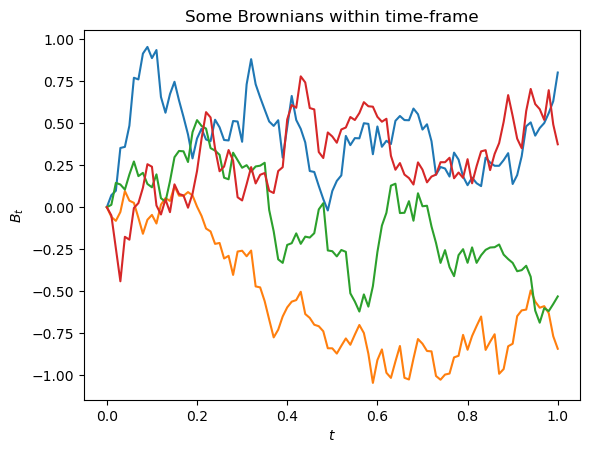

In [7]:
for i in range(4):
    plt.plot(x_axis, b.gen_normal(101))
plt.title("Some Brownians within time-frame")
plt.xlabel("$t$")
plt.ylabel("$B_t$")
plt.show()

## 1-Dimensional Stochastic Double Well

### Constructing the process

In [8]:
b = Brownian()

theta, mu, sigma, y0 = 1, 2, 1, 1
Y = np.zeros(N)
Y[0] = y0
brow = b.gen_normal(N+1)
db =  np.diff(brow)

In [9]:
for i in range(N-1):
    Y[i+1] = Y[i] + theta * Y[i] * (mu - Y[i]*Y[i]) * step + sigma * db[i]

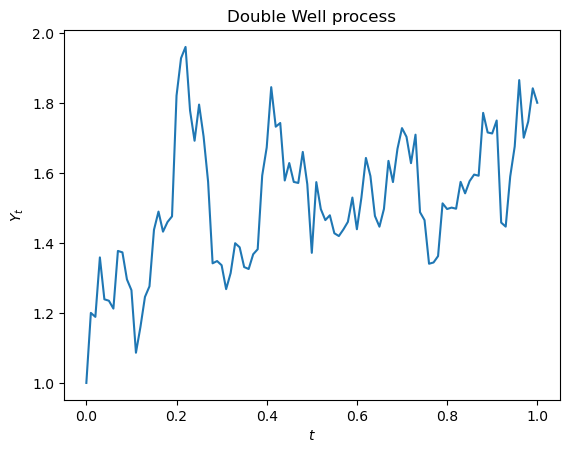

In [10]:
plt.plot(x_axis, Y)
plt.title("Double Well process")
plt.xlabel("$t$")
plt.ylabel("$Y_t$")
plt.show()

### Constructing the randomized signature

In [11]:
k = 10
A = np.random.normal(0, 1, size=(k, k))
b = np.random.normal(0, 1, size=k)
dY = np.diff(Y)
Z = np.zeros((N, k))
Z[0][0] = 1

In [12]:
for i in range(N-1):
    Z[i+1] = Z[i] + (A@Z[i] + b)*dY[i]

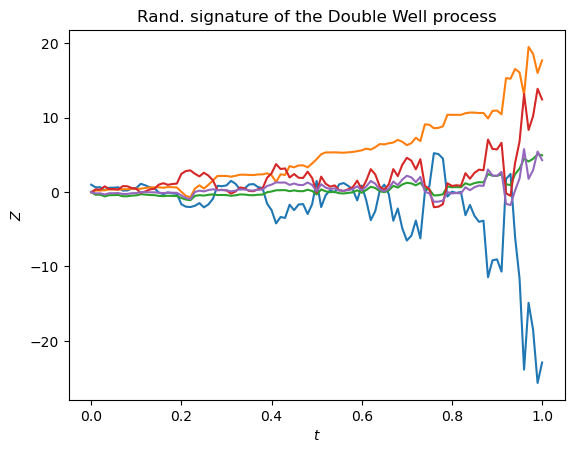

In [22]:
for i in range(5):
    plt.plot(x_axis, Z[:,i])

plt.title("Rand. signature of the Double Well process")
plt.xlabel("$t$")
plt.ylabel("$Z$")
plt.show()

In [14]:
Z.shape

(101, 10)

### Training the linear, time-homogeneous readout - without regularization

In [15]:
model1 = LinearRegression().fit(Z, Y)

In [16]:
r_sq_1 = model1.score(Z, Y)
print(f"coefficient of determination: {r_sq_1}")

coefficient of determination: 0.9999999508976231


In [17]:
print(f"intercept: {model1.intercept_}")

intercept: 0.1293912788947118


In [18]:
print(f"coefficients: {model1.coef_}")

coefficients: [ 0.87066958  0.40916085 -1.84964586  2.7706858  -0.12288585 -1.14284308
 -0.24361987 -2.10319902 -2.9645872   2.17114927]


In [19]:
Y_pred_1 = model1.predict(Z)

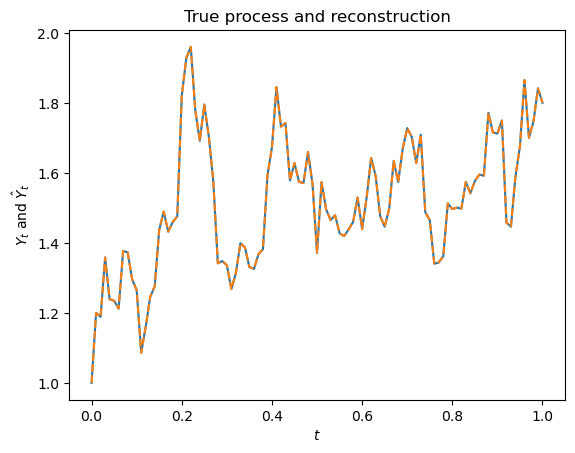

In [20]:
plt.plot(x_axis, Y)
plt.plot(x_axis, Y_pred_1, '--')
plt.title("True process and reconstruction")
plt.xlabel("$t$")
plt.ylabel("$Y_t$ and $\hat{Y}_t$")
plt.show()

### Training the linear, time-homogeneous readout - with regularization

In [21]:
model2 = Lasso(alpha=0.10)
model2.fit(Z, Y)

Lasso(alpha=0.1)

In [22]:
r_sq_2 = model2.score(Z, Y)
print(f"coefficient of determination: {r_sq_2}")

coefficient of determination: 0.4291779328875016


In [23]:
print(f"intercept: {model2.intercept_}")

intercept: 1.521363003500694


In [24]:
print(f"coefficients: {model2.coef_}")

coefficients: [-0.         -0.          0.         -0.         -0.00253813  0.01418599
 -0.         -0.         -0.         -0.        ]


In [25]:
Y_pred_2 = model2.predict(Z)

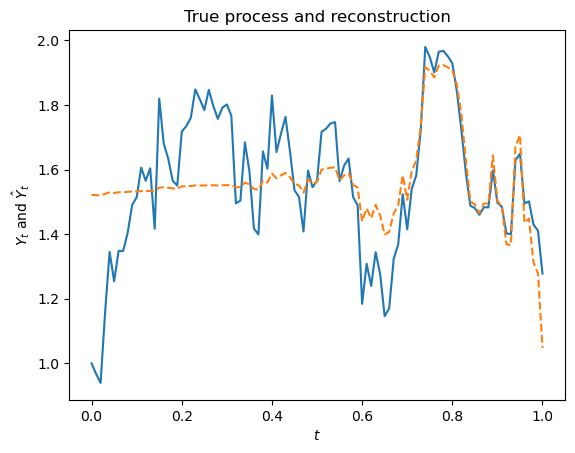

In [26]:
plt.plot(x_axis, Y)
plt.plot(x_axis, Y_pred_2, '--')
plt.title("True process and reconstruction")
plt.xlabel("$t$")
plt.ylabel("$Y_t$ and $\hat{Y}_t$")
plt.show()

### Simulating n_sim times and testing out of sample with Gaussians

In [23]:
n_sim = 1000
k = 15
A = np.random.normal(0, 1, size=(k, k))
b = np.random.normal(0, 1, size=k)
Y_big = np.zeros(N*n_sim)
Z_big = np.zeros((N*n_sim, k))
Y_big[0:N,] = np.ones(N)
Z_big[0:N,].shape

(101, 15)

In [24]:
for iter in range(n_sim):

    br = Brownian()
    Y = np.zeros(N)
    Y[0] = y0
    brow = br.gen_normal(N+1)
    db =  np.diff(brow)
    for i in range(N-1):
        Y[i+1] = Y[i] + theta * Y[i] * (mu - Y[i]*Y[i]) * step + sigma * db[i]
    dY = np.diff(Y)
    Z = np.zeros((N, k))
    Z[0][0] = 1
    for i in range(N-1):
        Z[i+1] = Z[i] + (A@Z[i] + b)*dY[i]
    Y_big[iter*N:(iter+1)*N] = Y
    Z_big[iter*N:(iter+1)*N,:] = Z

In [25]:
model3 = Ridge(alpha=1.0)
model3.fit(Z_big, Y_big)

Ridge()

In [26]:
r_sq_3 = model3.score(Z_big, Y_big)
print(f"coefficient of determination: {r_sq_3}")

coefficient of determination: 0.9999981538887556


In [27]:
print(f"intercept: {model3.intercept_}")

intercept: 0.8805448878157704


In [28]:
print(f"coefficients: {model3.coef_}")

coefficients: [ 0.11954093  0.04721015 -0.37621963  0.08990295 -0.1253738  -0.00909363
  0.191645    0.02784177 -0.02475045 -0.39525752  0.18147633  0.25145833
  0.15794516  0.0318736   0.07613956]


In [29]:
br = Brownian()
Y = np.zeros(N)
Y[0] = y0
brow = br.gen_normal(N+1)
db =  np.diff(brow)
for i in range(N-1):
    Y[i+1] = Y[i] + theta * Y[i] * (mu - Y[i]*Y[i]) * step + sigma * db[i]
dY = np.diff(Y)
Z = np.zeros((N, k))
Z[0][0] = 1
for i in range(N-1):
    Z[i+1] = Z[i] + (A@Z[i] + b)*dY[i]

In [30]:
Y_pred_3 = model3.predict(Z)

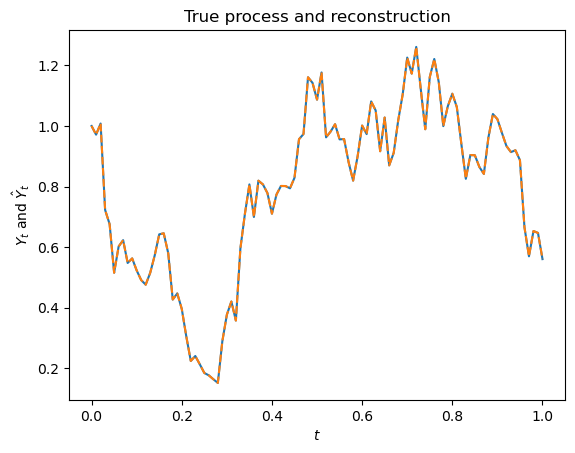

In [31]:
#Y_big[0:N]
plt.plot(x_axis, Y)
plt.plot(x_axis, Y_pred_3, '--')
plt.title("True process and reconstruction")
plt.xlabel("$t$")
plt.ylabel("$Y_t$ and $\hat{Y}_t$")
plt.show()

### Simulating n_sim times and testing out of sample with Bernoullis

In [32]:
n = 1
p = 0.5

In [33]:
n_sim = 1000
k = 15
A = np.random.binomial(n, p, size=(k,k))*2 - 1
b = np.random.binomial(n, p, size=k)*2 - 1
Y_big = np.zeros(N*n_sim)
Z_big = np.zeros((N*n_sim, k))
Y_big[0:N,] = np.ones(N)
A

array([[-1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1],
       [-1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1],
       [-1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1],
       [-1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1,  1],
       [ 1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1],
       [-1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1],
       [ 1,  1,  1, -1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1],
       [-1,  1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1,  1,  1],
       [ 1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1],
       [-1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1],
       [ 1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1, -1,  1, -1],
       [ 1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1],
       [-1,  1,  1, -1,  1, -1, -1,  1, -1, -1,  1, -1,  1, -1, -1],
       [-1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1],
       [ 1, -1,  1, -1,  1, -1,  1

In [34]:
for iter in range(n_sim):

    br = Brownian()
    Y = np.zeros(N)
    Y[0] = y0
    brow = br.gen_normal(N+1)
    db =  np.diff(brow)
    for i in range(N-1):
        Y[i+1] = Y[i] + theta * Y[i] * (mu - Y[i]*Y[i]) * step + sigma * db[i]
    dY = np.diff(Y)
    Z = np.zeros((N, k))
    Z[0][0] = 1
    for i in range(N-1):
        Z[i+1] = Z[i] + (A@Z[i] + b)*dY[i]
    Y_big[iter*N:(iter+1)*N] = Y
    Z_big[iter*N:(iter+1)*N,:] = Z

In [35]:
model4 = Ridge(alpha=10.0)
model4.fit(Z_big, Y_big)

Ridge(alpha=10.0)

In [36]:
r_sq_4 = model4.score(Z_big, Y_big)
print(f"coefficient of determination: {r_sq_4}")

coefficient of determination: 0.9999682427240125


In [37]:
print(f"intercept: {model4.intercept_}")

intercept: 0.8279042480799688


In [38]:
print(f"coefficients: {model4.coef_}")

coefficients: [ 0.17227892  0.19847646 -0.16032379 -0.36059767 -0.35914065 -0.15833962
 -0.0209235  -0.01147729  0.14276343  0.19378368  0.15498292 -0.12696435
  0.12362557 -0.1714678  -0.0088839 ]


In [39]:
br = Brownian()
Y = np.zeros(N)
Y[0] = y0
brow = br.gen_normal(N+1)
db =  np.diff(brow)
for i in range(N-1):
    Y[i+1] = Y[i] + theta * Y[i] * (mu - Y[i]*Y[i]) * step + sigma * db[i]
dY = np.diff(Y)
Z = np.zeros((N, k))
Z[0][0] = 1
for i in range(N-1):
    Z[i+1] = Z[i] + (A@Z[i] + b)*dY[i]

In [40]:
Y_pred_4 = model4.predict(Z)

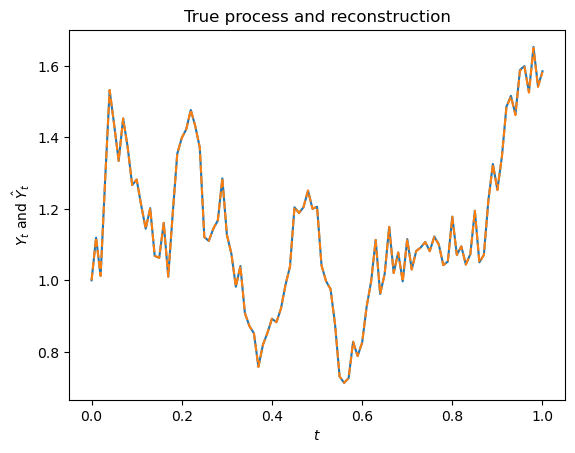

In [41]:
#Y_big[0:N]
plt.plot(x_axis, Y)
plt.plot(x_axis, Y_pred_4, '--')
plt.title("True process and reconstruction")
plt.xlabel("$t$")
plt.ylabel("$Y_t$ and $\hat{Y}_t$")
plt.show()

## 4-Dimensional Ornstein–Uhlenbeck process

### Constructing the process

In [46]:
y0_4, mu_4 = np.array([1,1,1,1]), np.array([1,1,1,1])
sigma_4 = np.array([[1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]])
theta_4 = np.array([[1,1/2,1/3,1/4], [2,1,2/3,2/4], [3,3/2,1,3/4], [4,2,4/3,1]])
Y_4 = np.zeros((N,4))
Y_4[0] = y0
brow_4 = np.zeros((N+1,4))
#sigma_4 = theta_4

In [47]:
b = Brownian()

for i in range(4):
    brow_4[:,i] = b.gen_normal(N+1)
db_4 = np.diff(brow_4, axis = 0)

In [48]:
for i in range(N-1):
    Y_4[i+1] = Y_4[i] + (mu_4 - theta_4 @ Y_4[i]) * step + sigma_4 @ db_4[i]

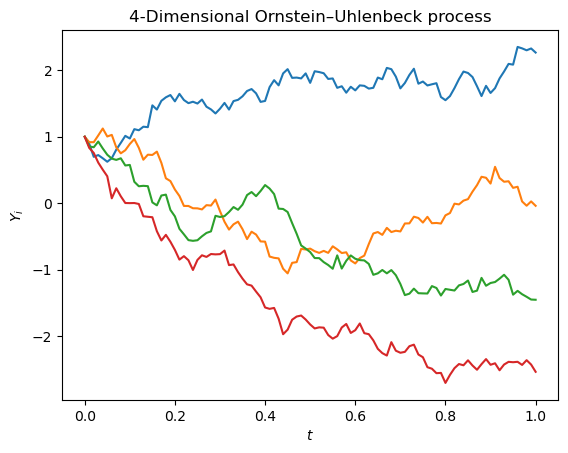

In [49]:
for i in range(4):
    plt.plot(x_axis, Y_4[:,i])

plt.title("4-Dimensional Ornstein–Uhlenbeck process")
plt.xlabel("$t$")
plt.ylabel("$Y_i$")
plt.show()

### Constructing the randomized signature

In [50]:
k_4 = 10
A_4 = np.random.normal(0, 1, size=(4, k_4, k_4))
b_4 = np.random.normal(0, 1, size=(4,k_4))
dY_4 = np.diff(Y_4, axis = 0)
Z_4 = np.zeros((N, k_4))
Z_4[0][0] = 1

In [51]:
dY_4.shape

(100, 4)

In [52]:
for i in range(N-1):
    for j in range(4):
        Z_4[i+1] = Z_4[i] + (A_4[j]@Z_4[i] + b_4[j])*dY_4[i][j]

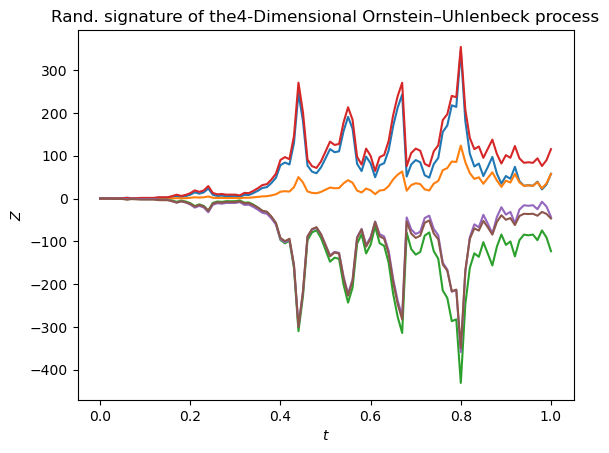

In [53]:
for i in range(6):
    plt.plot(x_axis, Z_4[:,i])

plt.title("Rand. signature of the4-Dimensional Ornstein–Uhlenbeck process")
plt.xlabel("$t$")
plt.ylabel("$Z$")
plt.show()